# Model and Metadata Analysis

In [1]:
import pandas as pd
import numpy as np 
import os
import sys

sys.path.append("..")
DATA_DIR = "~/Desktop/code/data/"

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import seaborn as sns

# Taxonomy

## Taxonomy of Training Set

In [2]:
# Training output with clustering and classification
train_df = pd.read_csv(os.path.join(DATA_DIR, 'model', 'train-output.csv'))

# BacDive taxonomy information
bacdive_df = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "bacdive-all.csv"), low_memory=False)
bd_taxonomy = bacdive_df[["taxon_id", "domain", "phylum", "class", "order", "family", "genus", "species"]]

neighbors_list = train_df["taxon_id"].to_list()
neighbors = bd_taxonomy["taxon_id"].isin(neighbors_list)
bd_taxonomy = bd_taxonomy[neighbors]
bd_taxonomy = bd_taxonomy.drop_duplicates()

# Merge for neighbor_taxonomy information (multiple taxonomic classifications for some taxon_id's)
train_taxa = pd.merge(left=train_df, right=bd_taxonomy, on="taxon_id", how="left")
train_taxa = train_taxa.drop_duplicates()

train_taxa.to_csv(os.path.join(DATA_DIR, "model", "train-taxa.csv"), index=False)
train_taxa.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
0     8.877258     5.368573     5.976608     5.567410     5.752917   
1     8.877258     5.368573     5.976608     5.567410     5.752917   
2     8.877258     5.368573     5.976608     5.567410     5.752917   
3     9.131594     5.638107     5.949810     5.132954     4.882958   
4     9.131594     5.638107     5.949810     5.132954     4.882958   

   Component 6  Component 7  Component 8  Component 9  Component 10  ...  \
0     4.890731     5.484498     5.908564     4.930583      5.352659  ...   
1     4.890731     5.484498     5.908564     4.930583      5.352659  ...   
2     4.890731     5.484498     5.908564     4.930583      5.352659  ...   
3     4.661012     5.534887     6.839547     4.804379      2.488934  ...   
4     4.661012     5.534887     6.839547     4.804379      2.488934  ...   

   KMeans Cluster  taxon_id  Media Cluster    domain          phylum  \
0             112     100.0            NaN  Bacteria  Proteobacteria   
1             112     100.0            NaN  Bacteria  Actinobacteria   
2             112     100.0            NaN  Bacteria  Actinobacteria   
3             164     100.0            NaN  Bacteria  Proteobacteria   
4             164     100.0            NaN  Bacteria  Actinobacteria   

                 class            order            family             genus  \
0  Alphaproteobacteria  Caulobacterales  Caulobacteraceae  Phenylobacterium   
1       Actinobacteria  Actinomycetales  Mycobacteriaceae     Mycobacterium   
2       Actinobacteria  Actinomycetales  Mycobacteriaceae     Mycobacterium   
3  Alphaproteobacteria  Caulobacterales  Caulobacteraceae  Phenylobacterium   
4       Actinobacteria  Actinomycetales  Mycobacteriaceae     Mycobacterium   

                    species  
0  Phenylobacterium panacis  
1     Mycobacterium triplex  
2    Mycobacterium branderi  
3  Phenylobacterium panacis  
4     Mycobacterium triplex  

[5 rows x 52 columns]

In [3]:
print(len(train_df), "training samples,", len(train_taxa), "taxonomic classifications")
print("Important! Expands for multiple taxonomic-level classifications for a single taxon_id, use og frame for mapping")

8464 training samples, 25006 taxonomic classifications
Important! Expands for multiple taxonomic-level classifications for a single taxon_id, use og frame for mapping


## Taxonomy of KNeighbors

In [4]:
# Model output with clustering and classification
model_df = pd.read_csv(os.path.join(DATA_DIR, 'model', 'ml-model-output.csv'))
model_df = model_df.rename(columns={"Media Cluster": "media_cluster", "taxon_id": "bin", "neighbor_taxon_id": "taxon_id"})

# BacDive taxonomy information
bacdive_df = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "bacdive-all.csv"), low_memory=False)
bd_taxonomy = bacdive_df[["taxon_id", "domain", "phylum", "class", "order", "family", "genus", "species"]]

neighbors_list = model_df["taxon_id"].to_list()
neighbors = bd_taxonomy["taxon_id"].isin(neighbors_list)
bd_taxonomy = bd_taxonomy[neighbors]
bd_taxonomy = bd_taxonomy.drop_duplicates()

# Merge for neighbor_taxonomy information (multiple taxonomic classifications for some taxon_id's)
model_neighbors = pd.merge(left=model_df, right=bd_taxonomy, on="taxon_id", how="left")

model_neighbors.to_csv(os.path.join(DATA_DIR, "model", "test-taxa.csv"), index=False)
model_neighbors.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
0     9.427101     5.556786     5.026694      4.71825     4.642046   
1     9.427101     5.556786     5.026694      4.71825     4.642046   
2     9.427101     5.556786     5.026694      4.71825     4.642046   
3     9.427101     5.556786     5.026694      4.71825     4.642046   
4     9.427101     5.556786     5.026694      4.71825     4.642046   

   Component 6  Component 7  Component 8  Component 9  Component 10  ...  \
0      4.58009     4.598486     4.929774       5.9216      6.780723  ...   
1      4.58009     4.598486     4.929774       5.9216      6.780723  ...   
2      4.58009     4.598486     4.929774       5.9216      6.780723  ...   
3      4.58009     4.598486     4.929774       5.9216      6.780723  ...   
4      4.58009     4.598486     4.929774       5.9216      6.780723  ...   

   neighbor_media_id  taxon_id  media_cluster    domain          phylum  \
0               J654     438.0            NaN  Bacteria  Actinobacteria   
1               J654     438.0            NaN  Bacteria  Proteobacteria   
2               J654     438.0            NaN  Bacteria  Proteobacteria   
3               J654     438.0            NaN  Bacteria  Planctomycetes   
4               J654     438.0            NaN  Bacteria      Firmicutes   

                class             order             family             genus  \
0      Actinobacteria   Actinomycetales    Nocardiopsaceae   Haloactinospora   
1  Betaproteobacteria   Burkholderiales     Sutterellaceae        Sutterella   
2  Betaproteobacteria   Burkholderiales     Sutterellaceae    Mesosutterella   
3       Phycisphaerae  Tepidisphaerales  Tepidisphaeraceae     Tepidisphaera   
4          Clostridia     Eubacteriales     Clostridiaceae  Terrisporobacter   

                         species  
0           Haloactinospora alba  
1   Sutterella megalosphaeroides  
2     Mesosutterella multiformis  
3           Tepidisphaera mucosa  
4  Terrisporobacter petrolearius  

[5 rows x 57 columns]

# Model Visualization

Complete model output:

In [283]:
# Highest-importance features
dim1 = "Component 38" 
dim2 = "Component 33"

In [284]:
train = pd.read_csv(os.path.join(DATA_DIR, "model", "train-output.csv"))
#train["Media Cluster"] = train["Media Cluster"].astype(str)
test = pd.read_csv(os.path.join(DATA_DIR, "model", "test-output.csv"))
print(len(train), "training points,", len(test), "test points")

# Plot the training points
fig = px.scatter(
    data_frame = train,
    x = dim1,
    y = dim2, # Change components to visualize each of the 30 dimensions
    color = "Media Cluster", 
    hover_data = ["taxon_id", "Target", "KMeans Cluster"], 
    opacity = 0.3,
    width=500, 
    height=500
) 

# Add the test points as a scatter trace
fig.add_trace(
    go.Scatter(
        x=test[dim1],  # x coordinates
        y=test[dim2],  # y coordinates
        mode='markers',
        marker=dict(
            color="black",  
            size=5,  
            opacity=1.0 
        ),
        text=test["taxon_id"]  # marker hover text
    )
)

# Configure opacity slider
steps = []
for i in range(11):  # 0 to 1 in steps of 0.1
    step = dict(
        method="restyle",
        args=[{"marker.opacity": [i/20]}, [0]],  # Adjust opacity of the training points trace only (trace index [0])
        label=str(i/20)
    )
    steps.append(step)

sliders = [dict(
    active=1,  # Initial value corresponding to opacity=0.1 (i.e., 1st step)
    currentvalue={"prefix": "Opacity: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title="40 Dimensions, Training & Test Model Outputs",
    template="plotly_white",
    showlegend=False,
    autosize=True
)

fig.show()

8464 training points, 247 test points


Model output subsets:

In [285]:
train = pd.read_csv(os.path.join(DATA_DIR, "model", "train-taxa.csv"))
test = pd.read_csv(os.path.join(DATA_DIR, "model", "output-metadata.csv")) # comes from Bin metadata section, this was added post-
print(len(train), "training points,", len(test), "test points")

25006 training points, 1235 test points


In [301]:
# TRAINING SET ONLY

fig = px.scatter(
    data_frame = train,
    x = dim1,
    y = dim2, # Change components to visualize each of the 30 dimensions
    color = "class",
    hover_data = ["taxon_id", "Target", "KMeans Cluster"],
    #opacity = 0.5,
    #title = "Class-Level Taxonomy, Training Set",
    template="plotly_white",
    width=500, 
    height=500
) 

fig.update_layout(showlegend=False)

fig.show()

Note: no strong correlation in the way taxonomic classes cluster -- could potentially suggest that to categorize metabolism in this way is good, considering taxa don't share the same "metabolic features", or could simply be model bias due to the annotations used.

In [51]:
# Weird formatting stuff for metadata
train = pd.read_csv(os.path.join(DATA_DIR, "model", "train-taxa.csv"))
test = pd.read_csv(os.path.join(DATA_DIR, "model", "output-metadata.csv"))
print(len(train), "training points,", len(test), "test points")

test["temp"] = test["temp"].astype(str)
test["ph"] = test["ph"].astype(str)

temp = test.copy()
temp["temp"] = temp["temp"].dropna()
temp_nan = temp["temp"].str.contains("nan")
temp = temp[~temp_nan]
temp["temp"] = temp["temp"].astype("f8")
print(len(temp), "points with temperature data")

ph = test.copy()
ph["ph"] = ph["ph"].dropna()
ph_nan = ph["ph"].str.contains("nan")
ph = ph[~ph_nan]
ph["ph"] = ph["ph"].astype("f8")
print(len(ph), "points with pH data")

25006 training points, 1235 test points
950 points with temperature data
950 points with pH data


In [312]:
# TEST SET ONLY

fig1 = px.scatter(
    data_frame = test,
    x = dim1,
    y = dim2, # Change components to visualize each of the 30 dimensions
    color = "SiteID",
    color_discrete_sequence=px.colors.sequential.Agsunset,
    hover_data = ["bin", "RF Classify"],
    #opacity = 0.2,
    #title = "SiteID, Test Set",
    template="plotly_white",
    width=500, 
    height=500
) 

fig2 = px.scatter(
    data_frame = temp,
    x = dim1,
    y = dim2, # Change components to visualize each of the 30 dimensions
    color = "temp",
    #color_continuous_scale=px.colors.cyclical.IceFire,
    color_continuous_scale=px.colors.sequential.thermal,
    hover_data = ["bin", "RF Classify"],
    opacity = 0.2,
    #title = "Temperature, Test Set",
    template="plotly_white",
    width=500, 
    height=500
) 

fig3 = px.scatter(
    data_frame = ph,
    x = dim1,
    y = dim2, # Change components to visualize each of the 30 dimensions
    color = "ph",
    color_continuous_scale=px.colors.sequential.thermal,
    hover_data = ["bin", "RF Classify"],
    opacity = 0.2,
    #title = "pH, Test Set",
    template="plotly_white",
    width=500, 
    height=500
) 

fig1.show()
fig2.show()
fig3.show()

Note: no strong or apparently visible correlation in any of these features, suggesting metabolic features are independent of these conditions

# Model EC & Cofactor Comparison

## EC Comparison

In [56]:
ml_input = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

bins = ml_input["source"].str.contains("KBase")
db = ml_input[~bins]
mag = ml_input[bins]

db_ec = db["ec"].to_list()
mag_ec = mag["ec"].to_list()

ec_mask = mag["ec"].isin(db_ec)
overlap = mag[ec_mask]
unique = mag[~ec_mask]

overlap_list = overlap["ec"].to_list()
ovset = set(overlap_list)

unique_list = unique["ec"].to_list()
unset = set(unique_list)

print(len(ovset), "overlapping EC's,", len(unset), "unique")

1518 overlapping EC's, 305 unique


3875 training ECs, 1823 test ECs


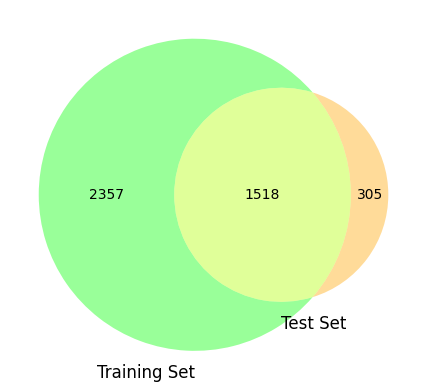

In [13]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

venn2(
    subsets=[
        set(db_ec),
        set(mag_ec)
    ],
    set_labels=[
        "Training Set",
        "Test Set"
    ],
    set_colors=[
        "lime",
        "orange"
    ]
)

print(len(set(db_ec)), "training ECs,", len(set(mag_ec)), "test ECs")

In [14]:
tec = pd.read_csv(os.path.join(DATA_DIR, 'taxa2ec-final.csv'), low_memory=False)

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df = tec.value_counts("ec").reset_index().copy() #ecs.value_counts originally
enzyme_df['Group'] = enzyme_df['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df = enzyme_df.groupby('Group')['count'].sum().reset_index()
grouped_df.columns = ['Group','Total Count']
# Adding information on the type of enzymes
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df['Class'] = ec_class

taxa_enzyme_counts = grouped_df[['Group','Class','Total Count']]
print(taxa_enzyme_counts)

# Plot the occurrence of enzymes across all of our selected taxa 
#fig = px.bar(taxa_enzyme_counts, x="Class", y="Total Count")
#fig.show()


  Group            Class  Total Count
0     1  Oxidoreductases       250577
1     2     Transferases       512583
2     3       Hydrolases       462458
3     4           Lyases       146148
4     5       Isomerases        99566
5     6          Ligases       141588
6     7     Translocases        48603


In [15]:
bec = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
bins = bec["source"].str.contains("KBase")
bec = bec[bins]

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df2 = bec.value_counts("ec").reset_index().copy() #ecs.value_counts originally
enzyme_df2['Group'] = enzyme_df2['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df2 = enzyme_df2.groupby('Group')['count'].sum().reset_index()
grouped_df2.columns = ['Group','Total Count']
# Adding information on the type of enzymes
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df2['Class'] = ec_class

bin_enzyme_counts = grouped_df2[['Group','Class','Total Count']]
print(bin_enzyme_counts)

# Plot the occurrence of enzymes across all of our selected taxa 
#fig = px.bar(bin_enzyme_counts, x="Class", y="Total Count")
#fig.show()

  Group            Class  Total Count
0     1  Oxidoreductases        19797
1     2     Transferases        43665
2     3       Hydrolases        18635
3     4           Lyases        11449
4     5       Isomerases         7521
5     6          Ligases         9864
6     7     Translocases         6191


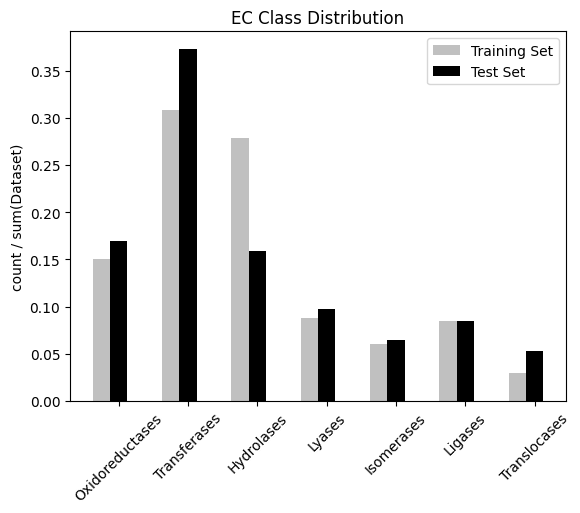

In [16]:
# Normalize counts
df1 = taxa_enzyme_counts.copy() 
sum1 = df1['Total Count'].sum(axis=0)
df1['Training_Proportion'] = df1['Total Count'].div(sum1)

df2 = bin_enzyme_counts.copy() 
sum2 = df2['Total Count'].sum(axis=0)
df2['Test_Proportion'] = df2['Total Count'].div(sum2)

N = 7
ind = np.arange(N)  
width = 0.25
  
xvals = df1['Training_Proportion']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = df2['Test_Proportion']
bar2 = plt.bar(ind+width, yvals, width, color='black') 
  
plt.xticks(ind+width,['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases'],rotation=45) 
plt.ylabel("count / sum(Dataset)") 
plt.title("EC Class Distribution") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set', 'Overlap')) 

plt.show() 

## Cofactor Comparison

In [2]:
ml_input = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
bins = ml_input["source"].str.contains("KBase")
bin_ec = ml_input[bins]

ec_list = bin_ec["ec"].to_list()
ec_list = set(ec_list)

print(len(ec_list), "unique bin ECs")

1823 unique bin ECs


In [3]:
# Retrieving bin cofactors
#import modules.cofactors as cofactors
#bin_cofactors = cofactors.ec2metals(ec_list)

#bin_cofactors.to_csv(os.path.join(DATA_DIR, "cofactors", "bins-cofactors-raw.csv"), index=False)
#bin_cofactors.head()

In [4]:
# Format ec2metals output
bin_cofactors = pd.read_csv((os.path.join(DATA_DIR, "cofactors", "bins-cofactors-raw.csv")))
cofactors = bin_cofactors.drop_duplicates().copy()
cofactors = cofactors.dropna(subset=['CofactorExtracted']).copy()

# List out all cofactors
CofactorFinal = cofactors.drop_duplicates(subset=['Query EC','CofactorFinal']).copy()
CofactorFinal.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), index=False) #SAVE

# Group cofactors by EC
grouped_cofactors = CofactorFinal.groupby("Query EC", as_index=False)["CofactorFinal"].apply(lambda x: "[%s]" % ', '.join(x))
grouped_cofactors.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins-grouped.csv"), index=False) #SAVE

grouped_cofactors.head()

Query EC CofactorFinal
0    1.1.1.1      [Zn, Fe]
1  1.1.1.103          [Zn]
2  1.1.1.105          [Zn]
3  1.1.1.133          [Mg]
4   1.1.1.17          [Zn]

In [5]:
print(len(CofactorFinal), "ECs with cofactors, approximately", len(grouped_cofactors), "of which are cambialistic")

1226 ECs with cofactors, approximately 707 of which are cambialistic


In [6]:
co = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), low_memory=False)
ct = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-taxa.csv"), low_memory=False)


#Create, merge, format counts 
coct = co["CofactorFinal"].value_counts().reset_index()
sum1 = coct["count"].sum(axis=0)
coct['ratio1'] = coct['count'].div(sum1)
coct = coct.rename(columns={"count": "count1"})

ctct = ct["CofactorFinal"].value_counts().reset_index()
sum2 = ctct["count"].sum(axis=0)
ctct['ratio2'] = ctct['count'].div(sum2)
ctct = ctct.rename(columns={"count": "count2"})

cf_df = pd.merge(left=coct, right=ctct, on="CofactorFinal", how="left")
cf_df = cf_df.fillna(0)

x = cf_df["count1"].sum(axis=0)
y = cf_df["count2"].sum(axis=0)
print(x, "annotated bin cofactors", y, "annotated database cofactors")

cf_df.to_csv("~/Desktop/cofactors.csv", index=False)
cf_df.head()

1226 annotated bin cofactors 3406 annotated database cofactors


CofactorFinal  count1    ratio1  count2    ratio2
0            Mg     305  0.248777     671  0.195228
1            Fe     214  0.174551     602  0.175153
2            Zn     157  0.128059     425  0.123654
3             S     127  0.103589     322  0.093686
4            Mn      93  0.075856     252  0.073320

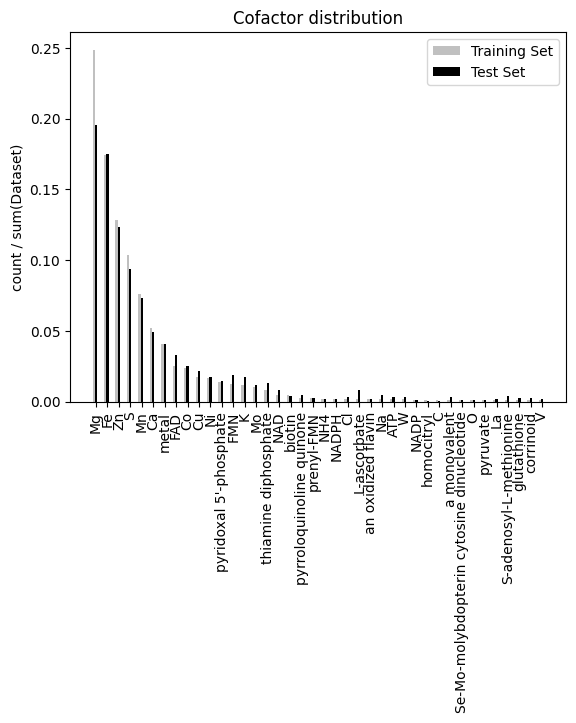

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 

data = cf_df #.head(40) # Subset full dataframe; usual length is ~45 cofactors
N = 40 # must equal the number of cofactors
ind = np.arange(N)  
width = 0.2
  
xvals = data['ratio1']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = data['ratio2']
bar2 = plt.bar(ind+width, yvals, width, color='black') 

plt.xticks(ind+width, data["CofactorFinal"], rotation=90) 
plt.ylabel("count / sum(Dataset)") 
plt.title("Cofactor distribution") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set'))

plt.show() 

NOTE: most "metal" annotations are vague "divalent metal cation", without a specific metals listed in UniProtKB

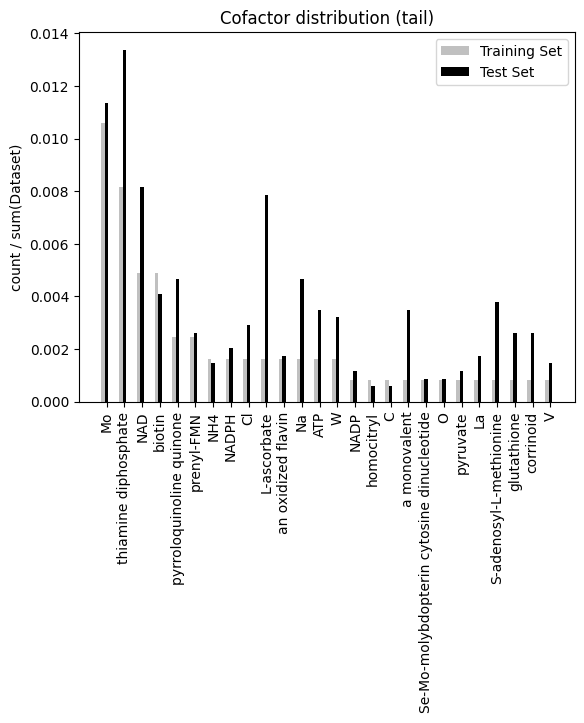

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 

n = 14 # number of highest abundance cofactors to omit
N = len(cf_df)-n
data = cf_df.iloc[n:n+N]
ind = np.arange(N)  
width = 0.2
  
xvals = data['ratio1']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = data['ratio2']
bar2 = plt.bar(ind+width, yvals, width, color='black') 

plt.xticks(ind+width, data["CofactorFinal"], rotation=90) 
plt.ylabel("count / sum(Dataset)") 
plt.title("Cofactor distribution (tail)") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set'))

plt.show() 

In [65]:
metals_df = cf_df.copy()

# Subset with ONLY metal cofactors:
metals = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "metals-list.csv"))
metals_list = metals['Metals'].to_list()
mask = metals_df['CofactorFinal'].isin(metals_list)
metals_cf = metals_df[mask]

import numpy as np 
import matplotlib.pyplot as plt 

data = metals_cf
N = 15
ind = np.arange(N)  
width = 0.2
  
xvals = data['ratio1']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = data['ratio2']
bar2 = plt.bar(ind+width, yvals, width, color='black') 

plt.xticks(ind+width, data["CofactorFinal"], rotation=90) 
plt.ylabel("count / sum(Dataset)") 
plt.title("Cofactor distribution (metals only)") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set'))

plt.show() 

In [66]:
# TODO: can investigate individual Sites? as ratios against either the training or test set

In [30]:
cf = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), low_memory=False)
cf = cf[["Query EC", "CofactorFinal"]]
cf = cf.rename(columns={"Query EC": "ec", "CofactorFinal": "cofactor"})

taxa = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
bins = taxa["source"].str.contains("KBase")
taxa = taxa[bins]

binco = pd.merge(left=taxa, right=cf, on="ec", how="left")
binco = binco[["taxon_id", "ec", "cofactor"]]
binco = binco.rename(columns={"taxon_id": "bin_name"})

binco.to_csv(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv"), index=False)
binco.head()

bin_name         ec cofactor
0  KBase_derived_Bin.001.fastaBA_F_extracted_bins...  2.1.1.297      NaN
1  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   6.1.1.21      NaN
2  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33      NH4
3  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33       Mn
4  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33        K

In [31]:
data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))

data = data.dropna()
data_heatmap = data[["bin_name", "cofactor"]].drop_duplicates()
data_heatmap["count"] = 1
data_heatmap = data_heatmap.pivot(index="bin_name", columns="cofactor", values="count") #.pivot

# Can set a filter to only show specific bins

#(z, text_auto=True, aspect="auto")
fig = px.imshow(data_heatmap, aspect="auto") #
fig.update_coloraxes(showscale=False)
fig.update_layout(template='plotly_white')
#fig.update_yaxes(showticklabels=False)

In [32]:
import seaborn as sns
data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))

data = data[["bin_name", "cofactor"]].drop_duplicates()
data["count"] = 1
data = pd.pivot_table(data, values='count', index='bin_name', columns='cofactor')
data = data.fillna(0)

cm = sns.clustermap(data, z_score=0, cmap="vlag", center=0, dendrogram_ratio=0.1) #, cbar_pos=(0.5, 0.9, 0.02, 0.10)
cm.cax.set_visible(False) # remove color bar for binary data

In [67]:
# Most impactful features for model outputs
m4f = ["4.1.1.17", "1.9.3.1", "3.5.1.5", "3.2.1.20", "1.1.1.1", "3.2.1.22", "2.1.2.1", "3.5.3.6", "3.2.1.21"]
print(len(m4f), "important model features (04-Model-Eval)")

# Retrieving bin cofactors
import modules.cofactors as cofactors
m4f_cofactors = cofactors.ec2metals(m4f)

# Format
cofactors = m4f_cofactors.drop_duplicates().copy()
cofactors = cofactors.dropna(subset=['CofactorExtracted']).copy()

CofactorFinal = cofactors.drop_duplicates(subset=['Query EC','CofactorFinal']).copy()
CofactorFinal.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-feature_importance.csv"), index=False) #SAVE

grouped_cofactors = CofactorFinal.groupby("Query EC", as_index=False)["CofactorFinal"].apply(lambda x: "[%s]" % ', '.join(x))
grouped_cofactors.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-feature_importance-grouped.csv"), index=False) #SAVE

grouped_cofactors

9 important model features (04-Model-Eval)


100%|██████████| 9/9 [00:09<00:00,  1.02s/it]


Query EC      CofactorFinal
0   1.1.1.1           [Zn, Fe]
1  3.2.1.20          [NAD, Mn]
2  3.2.1.22  [Mg, Ca, Mn, NAD]
3   3.5.1.5               [Ni]

# MAGs & Environmental Measurements

In [ ]:
model_df = pd.read_csv(os.path.join(DATA_DIR, 'model', 'ml-model-output.csv'))
model_df = model_df.rename(columns={"Media Cluster": "media_cluster", "taxon_id": "bin", "neighbor_taxon_id": "taxon_id"})

f_env = pd.read_csv(os.path.join(DATA_DIR, 'MAGs', 'FENIX21', 'envdata.csv'))
f_env = f_env.astype(str)
env_subset = f_env[["SiteID", "site_name", "waterType", "temp", "ph", "spc","sal", "alk_tot"]]
env_subset

SiteID                 site_name waterType   temp    ph    spc     sal  \
0      AS  Acqua sauna lido scoglio       nan   65.0  5.96    nan    36.0   
1      BA                   Bagnone       nan   64.0   7.0    nan     nan   
2      CA             Acqua Cantani   Ca-HCO3  17.48  6.34  2.757    0.14   
3      CF    Terme Caracciolo Forte   Ca-HCO3   53.0  5.36  3.067   0.156   
4      CG            Capasso geyser     Na-Cl   47.2  6.51   9.78   0.528   
5      CP        Capasso parcheggio       nan   46.9   nan  9.932     nan   
6      FE          Sorgente Ferrata   Ca-HCO3  15.22  6.49  1.946     0.1   
7      GA         Grotta dell'acqua     Na-Cl   32.6  6.41    nan    10.0   
8      LS           Lido lo scoglio     Na-Cl   47.8  6.12    nan    21.0   
9      ML       Madonna dei Lattani   Ca-HCO3   15.0   8.6   0.22   0.011   
10     PI           Piccolo Inferno    Ca-SO4   29.5  2.13   3.27   0.169   
11    SI1     Hotel Sinuessa anfora     Na-Cl   34.0  5.98  6.555   7.732   
12    SI2       Hotel Sinuess pozzo     Na-Cl   44.0  6.27    7.8   9.342   
13     SN           Stufe di Nerone     Na-Cl   63.0   6.1    nan    21.0   
14    SP1         Sorgente Petrinum       nan   35.0   6.1  5.888    6.88   
15    SP2         Sorgente Petrinum   Ca-HCO3   32.5   6.2    0.7   0.055   
16     SS      Hotel Sinuess strada       nan   50.3  6.04  8.575  10.356   
17     VR                  Varchera    Ca-SO4   14.0  5.98    nan     5.0   

   alk_tot  
0      nan  
1      nan  
2   1200.0  
3   1400.0  
4   1400.0  
5      nan  
6    800.0  
7    800.0  
8    600.0  
9    200.0  
10     0.0  
11  1000.0  
12  1400.0  
13   400.0  
14     nan  
15  2000.0  
16     nan  
17  1000.0

In [ ]:
# Merging our metadata with the model output
df1 = model_df
df2 = env_subset

# Using regex to capture the two-letter identifier
df1['SiteID'] = df1['bin'].str.extract(r'fasta([A-Z]{2})_(?:F|S)_extracted_bins')

# Clean up identifiers to ensure they match
df1.loc[:, 'SiteID'] = df1['SiteID'].str.strip().str.upper()
df2.loc[:, 'SiteID'] = df2['SiteID'].str.strip().str.upper()

# Merge our dataframes
benv = pd.merge(left=df1, right=df2, on="SiteID", how="left")

benv.to_csv(os.path.join(DATA_DIR, "model", "output-metadata.csv"), index=False)
benv.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
0     9.427101     5.556786     5.026694      4.71825     4.642046   
1     9.427101     5.556786     5.026694      4.71825     4.642046   
2     9.427101     5.556786     5.026694      4.71825     4.642046   
3     9.427101     5.556786     5.026694      4.71825     4.642046   
4     9.427101     5.556786     5.026694      4.71825     4.642046   

   Component 6  Component 7  Component 8  Component 9  Component 10  ...  \
0      4.58009     4.598486     4.929774       5.9216      6.780723  ...   
1      4.58009     4.598486     4.929774       5.9216      6.780723  ...   
2      4.58009     4.598486     4.929774       5.9216      6.780723  ...   
3      4.58009     4.598486     4.929774       5.9216      6.780723  ...   
4      4.58009     4.598486     4.929774       5.9216      6.780723  ...   

   taxon_id  media_cluster  SiteID  site_name  waterType  temp   ph  spc  sal  \
0     438.0            NaN      BA    Bagnone        nan  64.0  7.0  nan  nan   
1   33018.0            NaN      BA    Bagnone        nan  64.0  7.0  nan  nan   
2   65958.0            NaN      BA    Bagnone        nan  64.0  7.0  nan  nan   
3    1520.0           16.0      BA    Bagnone        nan  64.0  7.0  nan  nan   
4  589382.0            6.0      BA    Bagnone        nan  64.0  7.0  nan  nan   

   alk_tot  
0      nan  
1      nan  
2      nan  
3      nan  
4      nan  

[5 rows x 58 columns]

## Cofactors (upset, bar)

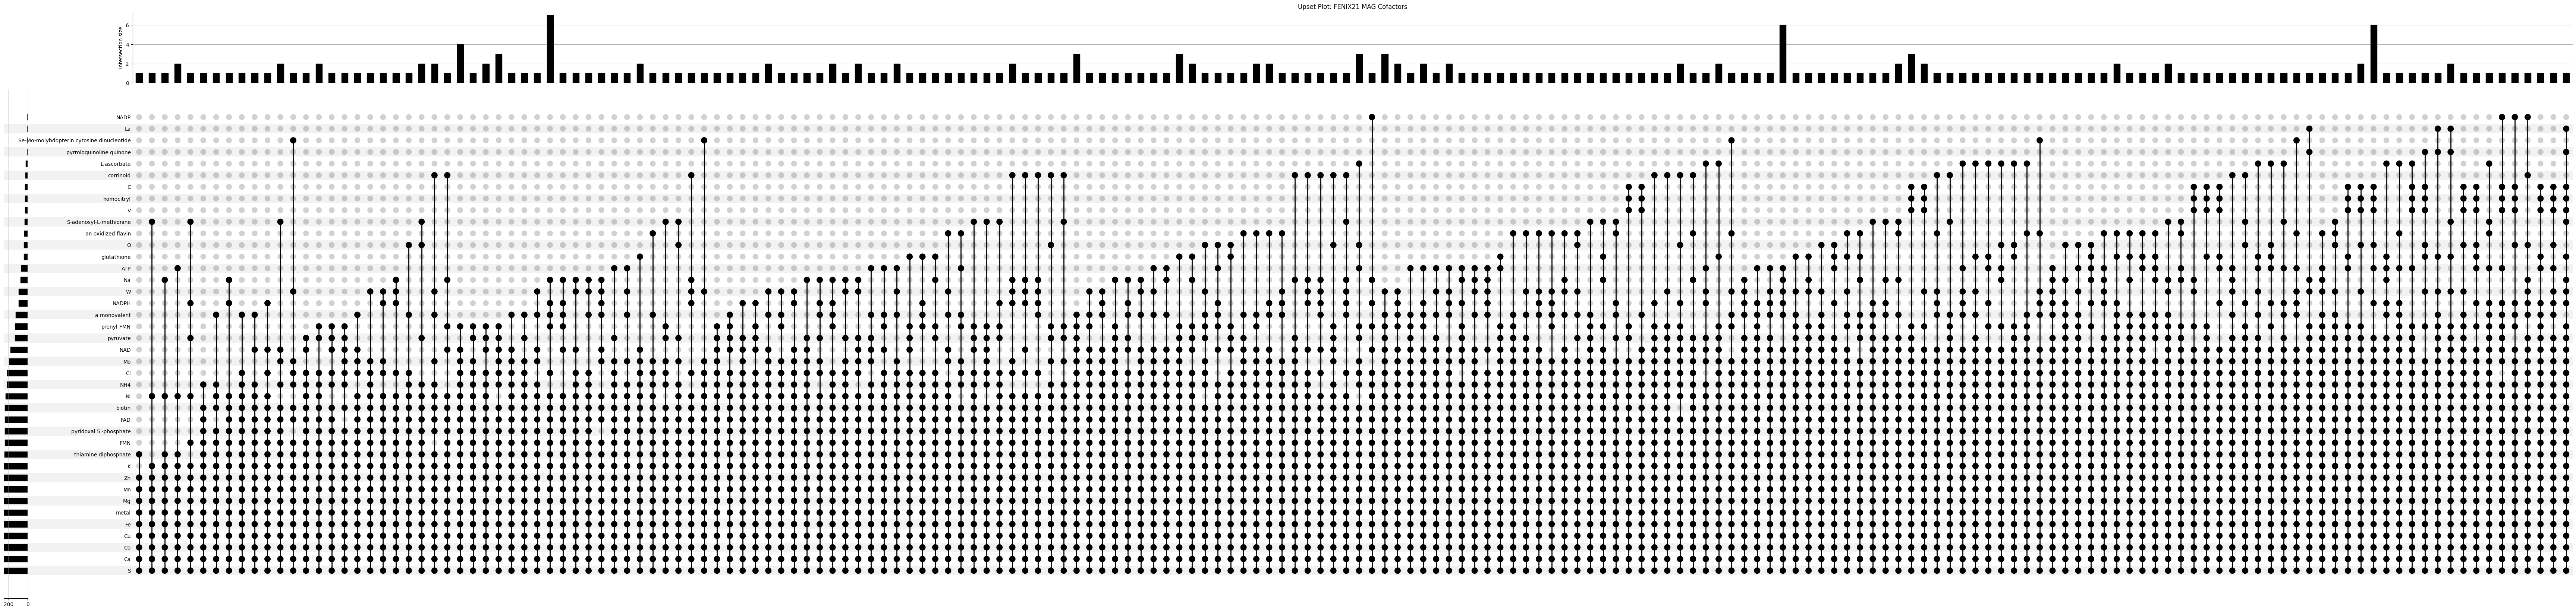

In [5]:
from upsetplot import UpSet, from_memberships
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
df = df.drop("ec", axis=1).dropna()

# Build matrix for cofactor upset plot
cofactor_matrix = df.pivot_table(index='bin_name', columns='cofactor', aggfunc=lambda x:True, fill_value=False)
cofactor_matrix.set_index(cofactor_matrix.columns.tolist(), inplace=True)
cofactor_matrix = cofactor_matrix.groupby(level=list(range(cofactor_matrix.index.nlevels))).size()

upset = UpSet(cofactor_matrix)
upset.plot()
ax = plt.gca()  # Get the current axis to modify
plt.title('Upset Plot: FENIX21 MAG Cofactors')
plt.show()
    # y-axis represents each of our cofactors, x-axis represents the different cases of overlap
    # left-hand bars represent relative abundances of each cofactors across all cases
    # bars above represent how many bins share the same overlap of cofactors

In [6]:
# Count the occurrences of each cofactor per bin
cofactor_counts = df.groupby(['bin_name', 'cofactor']).size().reset_index(name='count')
cofactor_distribution = cofactor_counts.groupby('cofactor')['count'].apply(list).reset_index()

# Convert the data into a long format suitable for seaborn
df_long = cofactor_counts

# Plot the box plots
plt.figure(figsize=(10, 5))
sns.boxplot(x='cofactor', y='count', data=df_long, color='red')
plt.title('Cofactor Distributions')
plt.xticks(rotation=90) 
plt.xlabel('')
#plt.ylim((0, 20))
plt.ylabel('Occurrences per MAG')
plt.show()

In [12]:
data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
data = data.dropna()

# Splitting into fluids/sediments
seds = data["bin_name"].str.contains("_S_")
sdf = data[seds]
fdf = data[~seds]

print("Cofactor sources:", len(sdf), "sediment-derived,", len(fdf), "fluid-derived")

# Making lists of bin names
bin_names = data["bin_name"].drop_duplicates()
sbn = bin_names[seds]
fbn = bin_names[~seds]

print("MAGs:", len(sbn), "sediment samples,", len(fbn), "fluid samples")

# Fluid proportions
df1 = fdf.drop(['bin_name', 'ec'], axis=1)
df1["count"] = 1
total1 = len(df1)
flugr = df1.groupby(['cofactor'])['count'].sum().reset_index()
flugr["ratio"] = flugr["count"].div(total1)

# Sediment proportions
df2 = sdf.drop(['bin_name', 'ec'], axis=1)
df2["count"] = 1
total2 = len(df2)
sedgr = df2.groupby(['cofactor'])['count'].sum().reset_index()
sedgr["ratio"] = sedgr["count"].div(total2)

# Filter
metals = ["Fe", "Mn", "V", "Co", "Ni", "Cu", "Zn", "Mo", "W"]
f1 = flugr["cofactor"].isin(metals)
f2 = sedgr["cofactor"].isin(metals)
flumet = flugr[f1]
sedmet = sedgr[f2]

# Merge
flumet = flumet.rename(columns={"count": "fluid_count", "ratio": "fluid_ratio"})
sedmet = sedmet.rename(columns={"count": "sed_count", "ratio": "sed_ratio"})
merged = pd.merge(left=flumet, right=sedmet, on="cofactor", how="left")

N = 9
ind = np.arange(N)  
width = 0.25
  
xvals = merged['fluid_ratio']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = merged['sed_ratio']
bar2 = plt.bar(ind+width, yvals, width, color='grey') 
  
plt.xticks(ind+width,merged["cofactor"]) 
plt.ylabel("Relative Abundance (%)") 
plt.title("Relative Cofactor Abundance") 
plt.legend((bar1, bar2), ('Fluids', 'Sediments')) 
plt.grid(False)

plt.show() 

Cofactor sources: 58025 sediment-derived, 66020 fluid-derived
MAGs: 105 sediment samples, 142 fluid samples


## Env Metals vs Cofactors

In [ ]:
data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
data = data.dropna()

# Splitting into fluids/sediments
seds = data["bin_name"].str.contains("_S_")
sdf = data[seds]
fdf = data[~seds]

print("Cofactor sources:", len(sdf), "sediment-derived,", len(fdf), "fluid-derived")

# Making lists of bin names
bin_names = data["bin_name"].drop_duplicates()
sbn = bin_names[seds]
fbn = bin_names[~seds]

print("MAGs:", len(sbn), "sediment samples,", len(fbn), "fluid samples")

print(sdf.head())
print(fdf.head())

Cofactor sources: 58025 sediment-derived, 66020 fluid-derived
MAGs: 105 sediment samples, 142 fluid samples
                                              bin_name        ec cofactor
574  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3       Fe
575  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3       Ca
576  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3       Cu
577  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3       Mg
578  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3        S
                                             bin_name         ec cofactor
2   KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33      NH4
3   KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33       Mn
4   KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33        K
10  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.5.1.19       Zn
11  KBase_derived_Bin.001.fastaBA_F_extracted_bins...  4.2.1.136        K


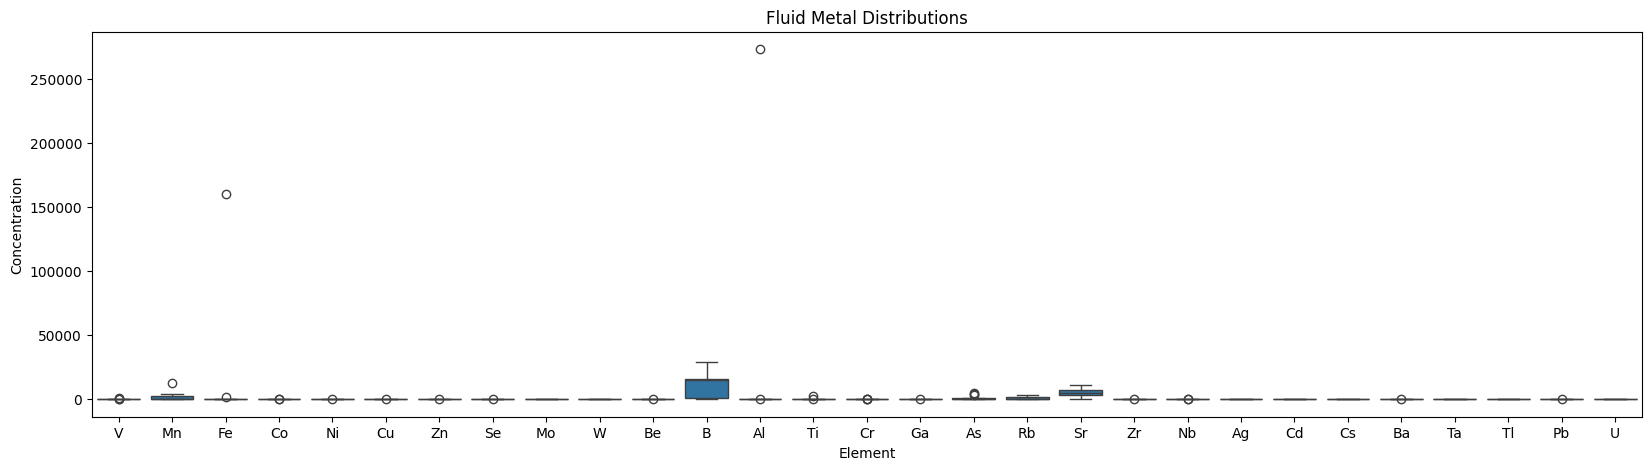

In [78]:
# Fluid metal distributions

fm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "fluid_metals.csv"))
df = fm.drop('ExpID', axis=1)

df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
df_melted = df.melt(id_vars=["SiteID"], var_name="Element", value_name="Concentration")
df_melted.dropna(subset=["Concentration"], inplace=True)

# toggle B (attention to plt.ylim())
b = df_melted["Element"].str.contains("b")
df_nob = df_melted[~b]

plt.figure(figsize=(20, 5))
sns.boxplot(x="Element", y="Concentration", data=df_melted)
#plt.ylim((0, 300))
plt.title("Fluid Metal Distributions")
plt.show()

fig = px.box(df_melted, 
    x="Element", 
    y="Concentration", 
    points="all",  # Show all points, including outliers
    hover_data=["SiteID"],  # Display SiteID on hover
    #title="Fluid Metal Distributions (all)",
    template="plotly_white"
)
#fig.update_yaxes(range=[0, 500])

fig.show()

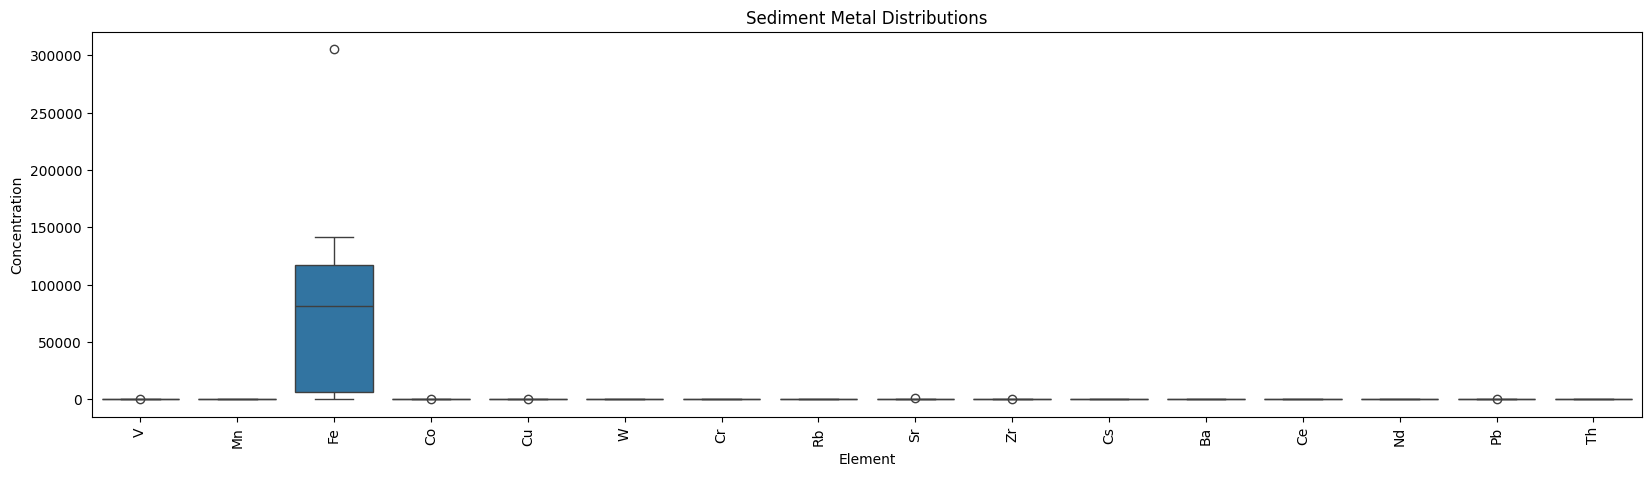

In [79]:
# Sediment metal distributions

sm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "sediment_metals.csv"))
df = sm.drop('ExpID', axis=1)

df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
df_melted = df.melt(id_vars=["SiteID"], var_name="Element", value_name="Concentration")
df_melted.dropna(subset=["Concentration"], inplace=True)

plt.figure(figsize=(20, 5))
sns.boxplot(x="Element", y="Concentration", data=df_melted)
#plt.ylim((0, 900)) 
plt.xticks(rotation=90)
plt.title("Sediment Metal Distributions")
plt.show()

fig = px.box(df_melted, 
    x="Element", 
    y="Concentration", 
    points="all",  # Show all points, including outliers
    hover_data=["SiteID"], 
    #title="Sediment Metal Distributions",
    template="plotly_white"
)

fig.show()


#### Combined box-and-whisker:

In [13]:
# Fluid cofactors:

data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
data = data.dropna()

bin_names = data["bin_name"].drop_duplicates()
seds = data["bin_name"].str.contains("_S_")
fbn = bin_names[~seds]
fdf = data[~seds]

# Using regex to capture the two-letter identifier
df1 = fdf.copy()
df1['SiteID'] = df1['bin_name'].str.extract(r'fasta([A-Z]{2})_(?:F|S)_extracted_bins')
df1.loc[:, 'SiteID'] = df1['SiteID'].str.strip().str.upper()

print(len(fbn), "fluid samples")

# Fluid metal distributions:

fm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "fluid_metals.csv"))
df = fm.drop('ExpID', axis=1)

df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
fluid_melted = df.melt(id_vars=["SiteID"], var_name="Element", value_name="Concentration")
fluid_melted.dropna(subset=["Concentration"], inplace=True)

#fluid_melted.head()

142 fluid samples


In [14]:
# Set cofactor counts for each site
df1["count"] = 1
df1_grouped = df1.groupby(['SiteID', 'cofactor'])['count'].sum().reset_index()

# Sum the number of cofactors for each site
site_total = df1_grouped.groupby(['SiteID'])['count'].sum().reset_index()
site_total = site_total.rename(columns={"count": "site_total"})

# Merge and calculate the normalized ratio for each site
fluid_cofactors = pd.merge(left=df1_grouped, right=site_total, on="SiteID", how="left")
fluid_cofactors["ratio"] = fluid_cofactors.iloc[:,2].div(fluid_cofactors.iloc[:,3])

#fluid_cofactors.head()

In [15]:
# Format dataframes for plotting

df1 = fluid_melted
df1['Type'] = 'Concentration'
df1 = df1.rename(columns={'Element': 'Metal', 'Concentration': 'Value'})

df2 = fluid_cofactors.drop(['count', 'site_total'], axis=1)
df2['Type'] = 'Ratio'
df2 = df2.rename(columns={'cofactor': 'Metal', 'ratio': 'Value'})

fluid_combined = pd.concat([df1, df2])

# Filter for the overlap between cofactors and available concentrations: 

fluid_metals = fluid_melted["Element"].to_list()
fm_list = set(fluid_metals)
filter1 = fluid_combined["Metal"].isin(fm_list)

metal_cofactors = fluid_cofactors["cofactor"].to_list()
mc_list = set(metal_cofactors)
filter2 = fluid_combined["Metal"].isin(mc_list)

fluid_combined = fluid_combined[filter1 & filter2]

fluid_combined

SiteID Metal     Value           Type
0       AS     V  2.618000  Concentration
2       CA     V  2.564000  Concentration
3       CF     V  0.363000  Concentration
4       CG     V  0.098000  Concentration
6       FE     V  2.275000  Concentration
..     ...   ...       ...            ...
324     SP    Mo  0.004663          Ratio
329     SP    Ni  0.004080          Ratio
333     SP     V  0.001166          Ratio
334     SP     W  0.002623          Ratio
335     SP    Zn  0.112504          Ratio

[200 rows x 4 columns]

In [16]:
# Toggle filter for high concentration metals
omit = ["Mn", "Fe"]
omm = fluid_combined["Metal"].isin(omit)

fluid_filter = fluid_combined[~omm]
fluid_outlier = fluid_combined[omm]

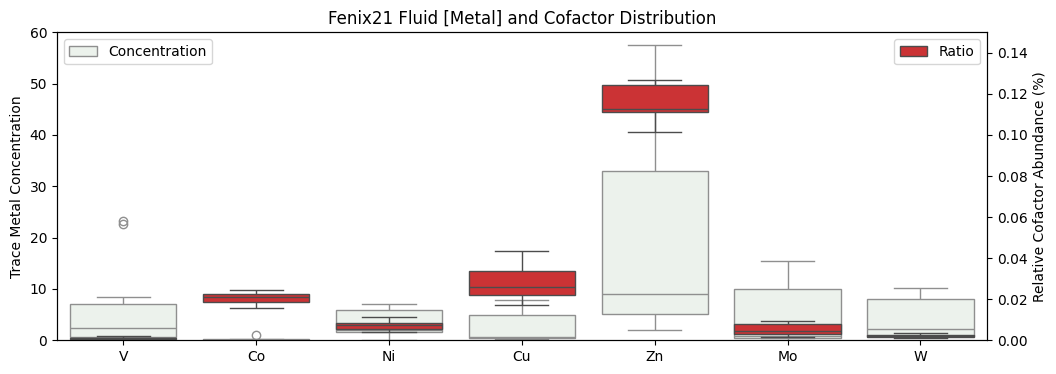

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 4))

# Boxplot for Concentration
sns.boxplot(x='Metal', y='Value', hue='Type', data=fluid_filter[fluid_filter['Type'] == 'Concentration'], ax=ax1, palette="light:g")
ax1.set_ylabel('Trace Metal Concentration')
ax1.set_xlabel(None)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
sns.boxplot(x='Metal', y='Value', hue='Type', data=fluid_filter[fluid_filter['Type'] == 'Ratio'], ax=ax2, palette="Set1")
ax2.set_ylabel('Relative Cofactor Abundance (%)')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(False)
ax2.grid(False)

ax1.set_ylim(0, 60)
ax2.set_ylim(0, 0.15)

plt.title('Fenix21 Fluid [Metal] and Cofactor Distribution')
plt.show()

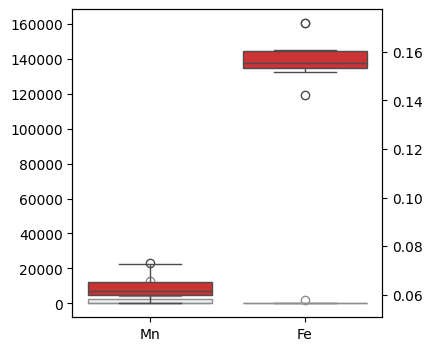

In [18]:
fig, ax1 = plt.subplots(figsize=(4, 4))

sns.boxplot(x='Metal', y='Value', hue='Type', data=fluid_outlier[fluid_outlier['Type'] == 'Concentration'], ax=ax1, palette="light:g")
ax2 = ax1.twinx()
sns.boxplot(x='Metal', y='Value', hue='Type', data=fluid_outlier[fluid_outlier['Type'] == 'Ratio'], ax=ax2, palette="Set1")

# Hide EVERYTHING
ax1.set_ylabel(None)
ax2.set_ylabel(None)
ax1.set_xlabel(None)
ax1.legend_.remove()
ax2.legend_.remove()
ax1.grid(False)
ax2.grid(False)

plt.show()

In [19]:
# Sediment cofactors:

data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
data = data.dropna()

bin_names = data["bin_name"].drop_duplicates()
seds = data["bin_name"].str.contains("_S_")
sbn = bin_names[seds]
sdf = data[seds]

# Using regex to capture the two-letter identifier
df1 = sdf.copy()
df1['SiteID'] = df1['bin_name'].str.extract(r'fasta([A-Z]{2})_(?:F|S)_extracted_bins')
df1.loc[:, 'SiteID'] = df1['SiteID'].str.strip().str.upper()

print(len(sbn), "sediment samples")


# Sediment metal distributions:

sm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "sediment_metals.csv"))
df = sm.drop('ExpID', axis=1)

df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
sed_melted = df.melt(id_vars=["SiteID"], var_name="Element", value_name="Concentration")
sed_melted.dropna(subset=["Concentration"], inplace=True)

# Set cofactor counts for each site
df1["count"] = 1
df1_grouped = df1.groupby(['SiteID', 'cofactor'])['count'].sum().reset_index()

# Sum the number of cofactors for each site
site_total = df1_grouped.groupby(['SiteID'])['count'].sum().reset_index()
site_total = site_total.rename(columns={"count": "site_total"})

# Merge and calculate the normalized ratio for each site
sed_cofactors = pd.merge(left=df1_grouped, right=site_total, on="SiteID", how="left")
sed_cofactors["ratio"] = sed_cofactors.iloc[:,2].div(sed_cofactors.iloc[:,3])


# Format dataframes for plotting

df1 = sed_melted
df1['Type'] = 'Concentration'
df1 = df1.rename(columns={'Element': 'Metal', 'Concentration': 'Value'})

df2 = sed_cofactors.drop(['count', 'site_total'], axis=1)
df2['Type'] = 'Ratio'
df2 = df2.rename(columns={'cofactor': 'Metal', 'ratio': 'Value'})

sed_combined = pd.concat([df1, df2])

# Filter for the overlap between cofactors and available concentrations: 

sediment_metals = sed_melted["Element"].to_list()
sm_list = set(sediment_metals)
filter1 = sed_combined["Metal"].isin(sm_list)

metal_cofactors = sed_cofactors["cofactor"].to_list()
mc_list = set(metal_cofactors)
filter2 = sed_combined["Metal"].isin(mc_list)

sed_combined = sed_combined[filter1 & filter2]


# Toggle filter for high concentration metals
omit = ["Fe"]
omm = sed_combined["Metal"].isin(omit)

sed_filter = sed_combined[~omm]
sed_outlier = sed_combined[omm]

105 sediment samples


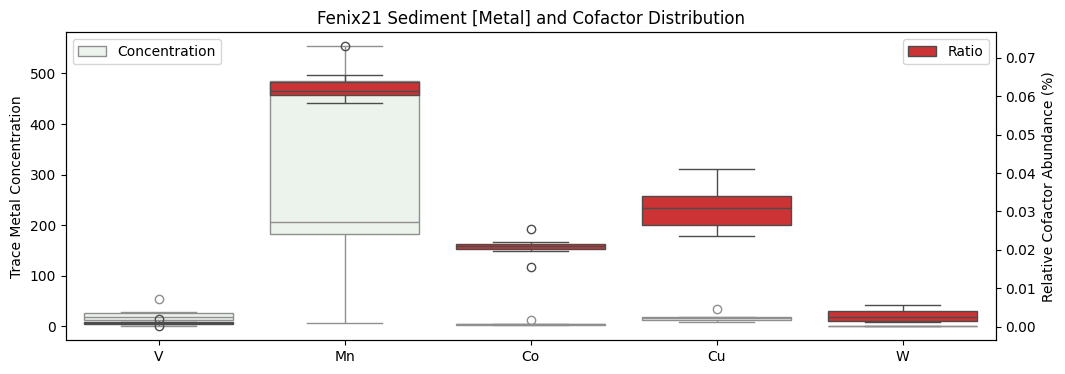

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 4))

# Boxplot for Concentration
sns.boxplot(x='Metal', y='Value', hue='Type', data=sed_filter[sed_filter['Type'] == 'Concentration'], ax=ax1, palette="light:g")
ax1.set_ylabel('Trace Metal Concentration')
ax1.set_xlabel(None)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
sns.boxplot(x='Metal', y='Value', hue='Type', data=sed_filter[sed_filter['Type'] == 'Ratio'], ax=ax2, palette="Set1")
ax2.set_ylabel('Relative Cofactor Abundance (%)')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(False)
ax2.grid(False)

#ax1.set_ylim(0, 60)
#ax2.set_ylim(0, 0.15)

plt.title('Fenix21 Sediment [Metal] and Cofactor Distribution')
plt.show()

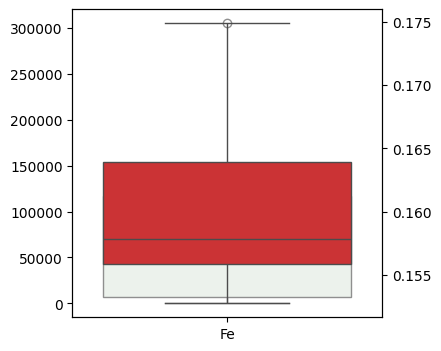

In [21]:
fig, ax1 = plt.subplots(figsize=(4, 4))

sns.boxplot(x='Metal', y='Value', hue='Type', data=sed_outlier[sed_outlier['Type'] == 'Concentration'], ax=ax1, palette="light:g")
ax2 = ax1.twinx()
sns.boxplot(x='Metal', y='Value', hue='Type', data=sed_outlier[sed_outlier['Type'] == 'Ratio'], ax=ax2, palette="Set1")

# Hide EVERYTHING
ax1.set_ylabel(None)
ax2.set_ylabel(None)
ax1.set_xlabel(None)
ax1.legend_.remove()
ax2.legend_.remove()
ax1.grid(False)
ax2.grid(False)

plt.show()

# Model Output Analysis

## Classifier comparison

In [ ]:
ml_output = pd.read_csv(os.path.join(DATA_DIR, "model", "ml-model-output.csv"))

#df = ml_output.drop(ml_output.columns[0:32], axis=1)
df = ml_output[["taxon_id", "Test Cluster", "RF Classify", "KNN Classify", "neighbor_taxon_id", "neighbor_media_id"]]
df = df.rename(columns={
    "taxon_id": "bin_name", 
    "Test Cluster": "KM_cluster",
    "RF Classify": "RF_cluster",
    "KNN Classify": "KN_cluster"
})
df.head()

bin_name  KM_cluster  RF_cluster  \
0  KBase_derived_Bin.001.fastaBA_F_extracted_bins...         138         138   
1  KBase_derived_Bin.001.fastaBA_F_extracted_bins...         138         138   
2  KBase_derived_Bin.001.fastaBA_F_extracted_bins...         138         138   
3  KBase_derived_Bin.001.fastaBA_F_extracted_bins...         138         138   
4  KBase_derived_Bin.001.fastaBA_F_extracted_bins...         138         138   

   KN_cluster  neighbor_taxon_id neighbor_media_id  
0         138              438.0              J654  
1         138            33018.0               J92  
2         138            65958.0              J960  
3         138             1520.0               87a  
4         138           589382.0               J27

In [ ]:
df_combined = df.groupby('bin_name', as_index=False).agg({
    'KM_cluster': lambda x: list(set(x)),
    'RF_cluster': lambda x: list(set(x)),
    'KN_cluster': lambda x: list(set(x))
})

def combine_clusters(row):
    combined_set = set(row['KM_cluster'] + row['RF_cluster'] + row['KN_cluster'])
    return ', '.join(map(str, sorted(combined_set)))

df_combined['clusters'] = df_combined.apply(combine_clusters, axis=1)
df_combined = df_combined.drop(columns=['KM_cluster', 'RF_cluster', 'KN_cluster'])
df_combined

bin_name clusters
0    KBase_derived_Bin.001.fastaBA_F_extracted_bins...      138
1    KBase_derived_Bin.001.fastaBA_S_extracted_bins...      163
2    KBase_derived_Bin.001.fastaCF_F_extracted_bins...      138
3    KBase_derived_Bin.001.fastaCG_S_extracted_bins...      138
4    KBase_derived_Bin.001.fastaFE_F_extracted_bins...      163
..                                                 ...      ...
242  KBase_derived_Bin.033.fastaLS_S_extracted_bins...  94, 181
243  KBase_derived_Bin.034.fastaCA_F_extracted_bins...       94
244  KBase_derived_Bin.037.fastaLS_S_extracted_bins...  94, 117
245  KBase_derived_Bin.038.fastaLS_S_extracted_bins...       94
246  KBase_derived_Bin.039.fastaLS_S_extracted_bins...      123

[247 rows x 2 columns]

## Feature statistics

In [22]:
# Creating a dataframe with key metabolic features for our bins
bin_metab = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

# Filter for only the bins
bins = bin_metab["source"].str.contains("KBase")
bin_metab = bin_metab[bins]
bin_metab = bin_metab.drop(["media_id", "species", "source"], axis=1)

# Using regex to capture the two-letter identifier
bin_metab['SiteID'] = bin_metab['taxon_id'].str.extract(r'fasta([A-Z]{2})_(?:F|S)_extracted_bins')
bin_metab.loc[:, 'SiteID'] = bin_metab['SiteID'].str.strip().str.upper()

# Relabel
bin_metab = bin_metab[[ "SiteID", "taxon_id", "ec"]]
bin_metab = bin_metab.rename(columns={"taxon_id": "bin_name"})

# Formatting cofactor information
bin_cofactors = pd.read_csv((os.path.join(DATA_DIR, "cofactors", "cofactors-bins-grouped.csv")))

bin_cofactors = bin_cofactors[["Query EC", "CofactorFinal"]] 
bin_cofactors = bin_cofactors.rename(columns={"Query EC": "ec", "CofactorFinal": "cofactor"})

# Merge information
bin_features = pd.merge(left=bin_metab, right=bin_cofactors, on="ec", how="left")
bin_features.to_csv(os.path.join(DATA_DIR, "bin-metabolic-features.csv"), index=False)

bin_features.head()

SiteID                                           bin_name         ec  \
0     BA  KBase_derived_Bin.001.fastaBA_F_extracted_bins...  2.1.1.297   
1     BA  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   6.1.1.21   
2     BA  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33   
3     BA  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.8.1.13   
4     BA  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.6.1.42   

       cofactor  
0           NaN  
1           NaN  
2  [NH4, Mn, K]  
3           NaN  
4           NaN

In [23]:
print("Some statistics:")

a = len(bin_metab)
b = len(bin_cofactors)
c = len(bin_features)

bin_list = bin_features["bin_name"].to_list()
bin_list = set(bin_list)
d = len(bin_list)

ec_list = bin_metab["ec"].to_list()
ec_list = set(ec_list)

print(a, "total EC annotations")
print(len(ec_list), "unique ECs")
print(b, "ECs with cofactors")
print(d, "bins")
#print(c) #equal to a
print(c/d, "average annotations per bin")

Some statistics:
117122 total EC annotations
1823 unique ECs
707 ECs with cofactors
247 bins
474.1781376518219 average annotations per bin


In [25]:
# Investigate outliers:
df = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
df["taxon_id"] = df["taxon_id"].astype(str)

bin1 = "Bin.003.fastaCG_F"
bin2 = "Bin.013.fastaSN_F"
bin3 = "Bin.017.fastaSI_1_F"

target1 = df["taxon_id"].str.contains(bin1)
target2 = df["taxon_id"].str.contains(bin2) 
target3 = df["taxon_id"].str.contains(bin3) 

df1 = df[target1]
df2 = df[target2]
df3 = df[target3]

print(len(df1), "EC annotations for", bin1)
print(len(df2), "EC annotations for", bin2)
print(len(df3), "EC annotations for", bin3)

print("For reference: approximately 474 annotations per bin on average")

67 EC annotations for Bin.003.fastaCG_F
208 EC annotations for Bin.013.fastaSN_F
306 EC annotations for Bin.017.fastaSI_1_F
For reference: approximately 474 annotations per bin on average


# End

In [1]:
#TODO: sum or map across different major ions and trace elements (Model Visualization)
#TODO: explode on the cofactors, identify metals, align on site envdata to list site concentrations next to the respective cofactor 
#   (can also compare / align with bin nearest neighbors / medias / trace metal concentrations)